In [ ]:
# import data
D = {((23,36), 0.1), ((23,34), 0), ((26,29), 1.2), ((21,40), -0.5), ((20,33), -1.5), ((25,35), 0.7)}

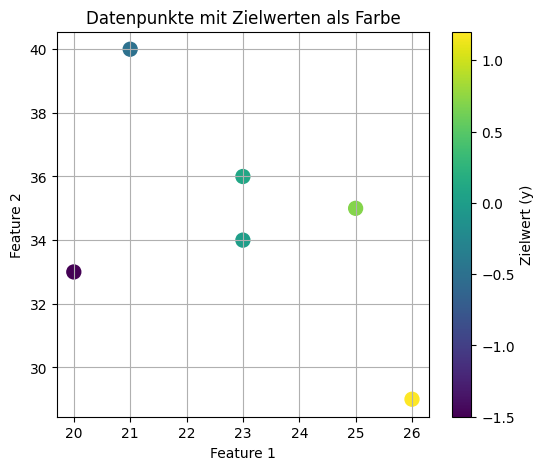

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Daten extrahieren
X = np.array([x for x, _ in D])
y = np.array([y for _, y in D])

# Plot
plt.figure(figsize=(6, 5))
plt.grid(True)
scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis', s=100)
plt.colorbar(scatter, label="Zielwert (y)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.title("Datenpunkte mit Zielwerten als Farbe")
plt.show()

In [11]:
X

array([[20, 33],
       [26, 29],
       [25, 35],
       [23, 34],
       [21, 40],
       [23, 36]])

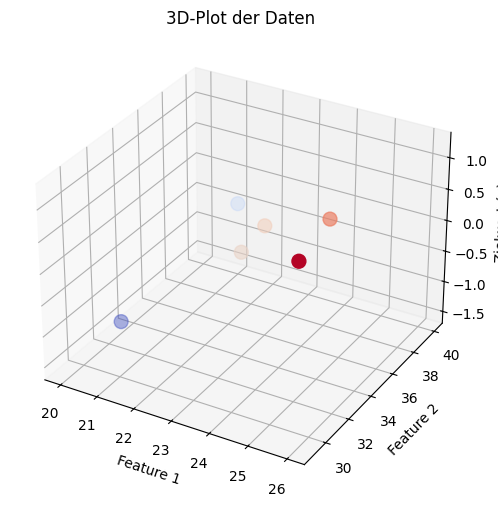

In [7]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(7, 6))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', s=100)

ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Zielwert (y)")
ax.set_title("3D-Plot der Daten")
plt.show()

In [17]:
# Linear Regression
from sklearn.linear_model import LinearRegression


regr = LinearRegression().fit(X, y)
np.round(regr.coef_,3)

array([0.445, 0.049])

In [18]:
np.round(regr.intercept_,3)

np.float64(-11.918)

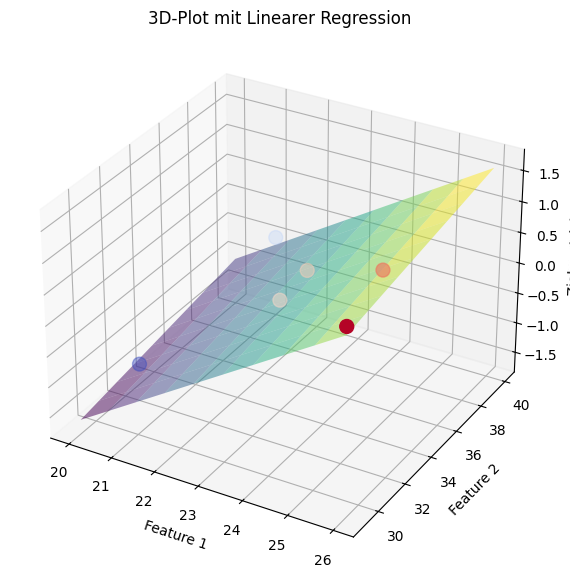

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression

# Beispiel-Daten
X = np.array([
    [23, 36],
    [23, 34],
    [26, 29],
    [21, 40],
    [20, 33],
    [25, 35]
])
y = np.array([0.1, 0, 1.2, -0.5, -1.5, 0.7])

# Modell trainieren
regr = LinearRegression().fit(X, y)

# 3D-Plot vorbereiten
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')

# Originalpunkte plotten
ax.scatter(X[:, 0], X[:, 1], y, c=y, cmap='coolwarm', s=100, label='Daten')

# Regressionsfläche erzeugen
x_surf, y_surf = np.meshgrid(
    np.linspace(X[:, 0].min(), X[:, 0].max(), 10),
    np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
)
# Fläche in Shape (n, 2) bringen
X_surf = np.column_stack((x_surf.ravel(), y_surf.ravel()))
z_surf = regr.predict(X_surf).reshape(x_surf.shape)

# Fläche zeichnen
ax.plot_surface(x_surf, y_surf, z_surf, alpha=0.5, cmap='viridis', edgecolor='none', label='Regression')

# Achsenbeschriftung
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.set_zlabel("Zielwert (y)")
ax.set_title("3D-Plot mit Linearer Regression")

plt.show()
